# CARICAMENTO DATI E STATS

Vengono caricati i file principali del dataset MovieLens e analizzate le loro caratteristiche, mostrando per ogni colonna il numero di valori totali e unici, insieme a informazioni descrittive e rappresentazioni grafiche dei dati.


--- MOVIES.CSV ---
movieId (Numerico): min=1, max=209171, dtype=int64
title (Categorico): 62325 valori unici, esempi=['Toy Story (1995)' 'Jumanji (1995)' 'Grumpier Old Men (1995)'
 'Waiting to Exhale (1995)' 'Father of the Bride Part II (1995)'
 'Heat (1995)' 'Sabrina (1995)' 'Tom and Huck (1995)'
 'Sudden Death (1995)' 'GoldenEye (1995)']
genres (Categorico): 1639 valori unici, esempi=['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror']


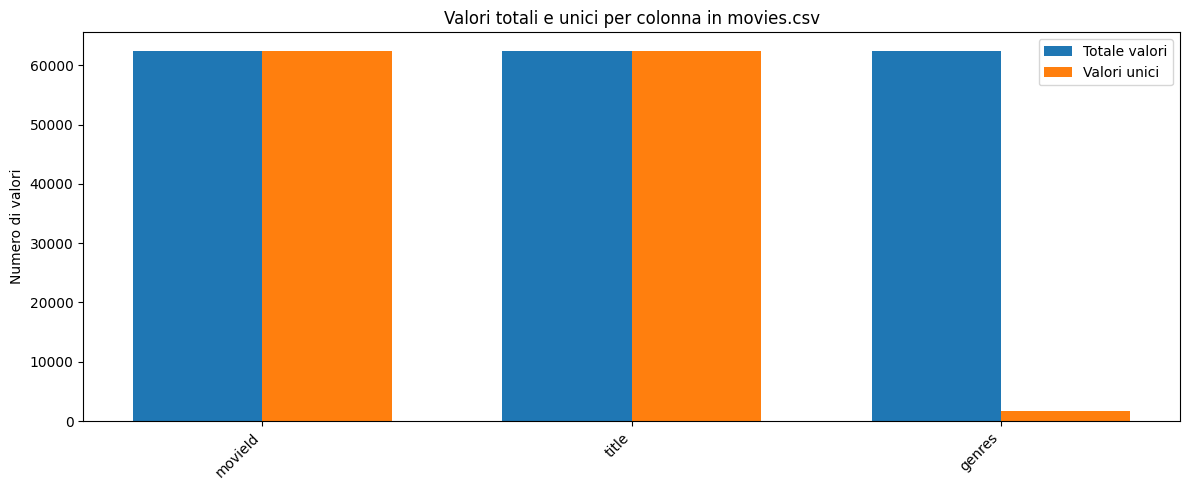


--- RATINGS.CSV ---
userId (Numerico): min=1, max=162541, dtype=int64
movieId (Numerico): min=1, max=209171, dtype=int64
rating (Numerico): min=0.5, max=5.0, dtype=float64
timestamp (Numerico): min=789652009, max=1574327703, dtype=int64


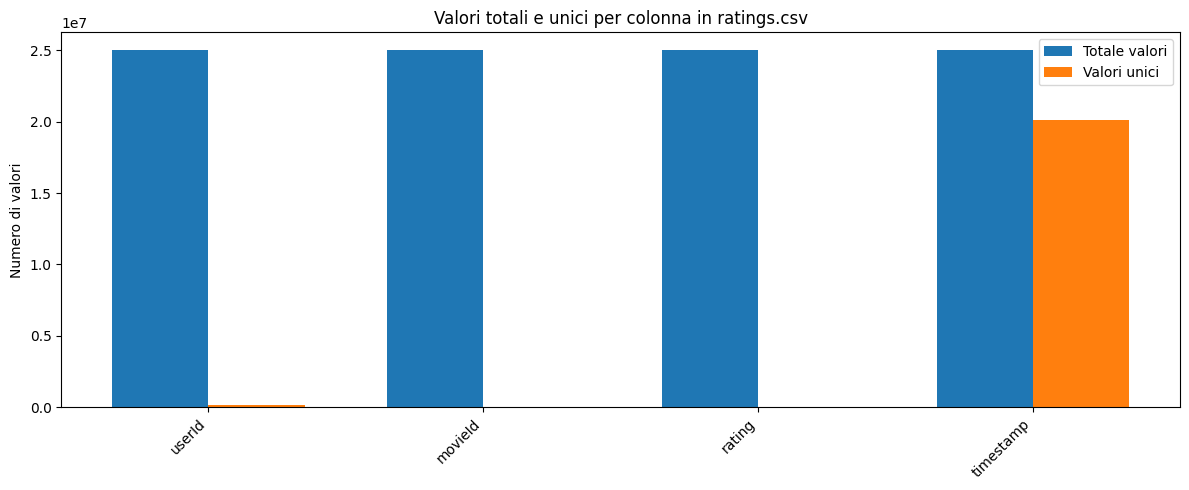


--- TAGS.CSV ---
userId (Numerico): min=3, max=162534, dtype=int64
movieId (Numerico): min=1, max=209063, dtype=int64
tag (Categorico): 73051 valori unici, esempi=['classic' 'sci-fi' 'dark comedy' 'great dialogue' "so bad it's good"
 'unreliable narrators' 'tense' 'artificial intelligence' 'philosophical'
 'cliche']
timestamp (Numerico): min=1135429210, max=1574316696, dtype=int64


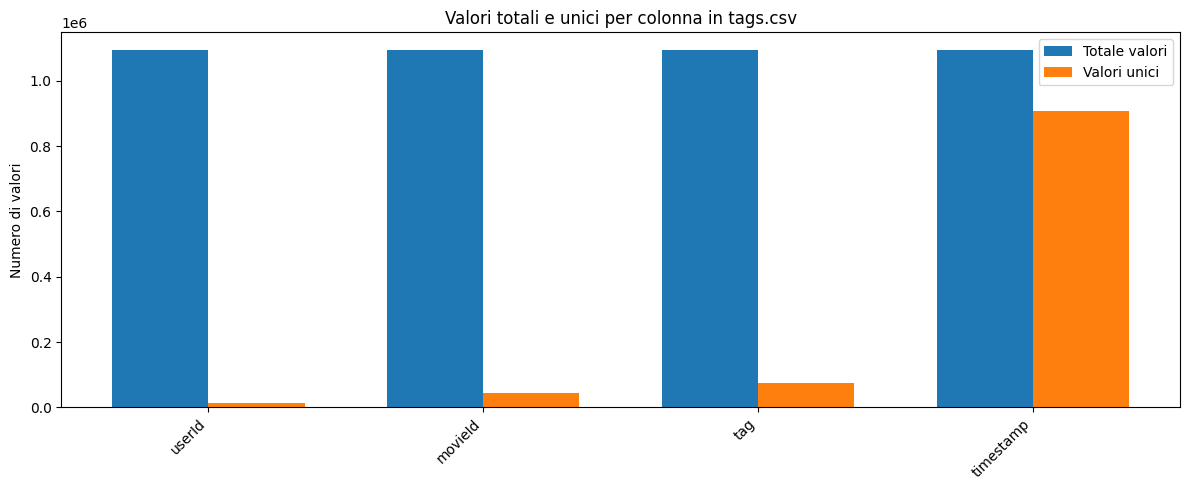


--- LINKS.CSV ---
movieId (Numerico): min=1, max=209171, dtype=int64
imdbId (Numerico): min=1, max=11170942, dtype=int64
tmdbId (Numerico): min=2.0, max=646282.0, dtype=float64


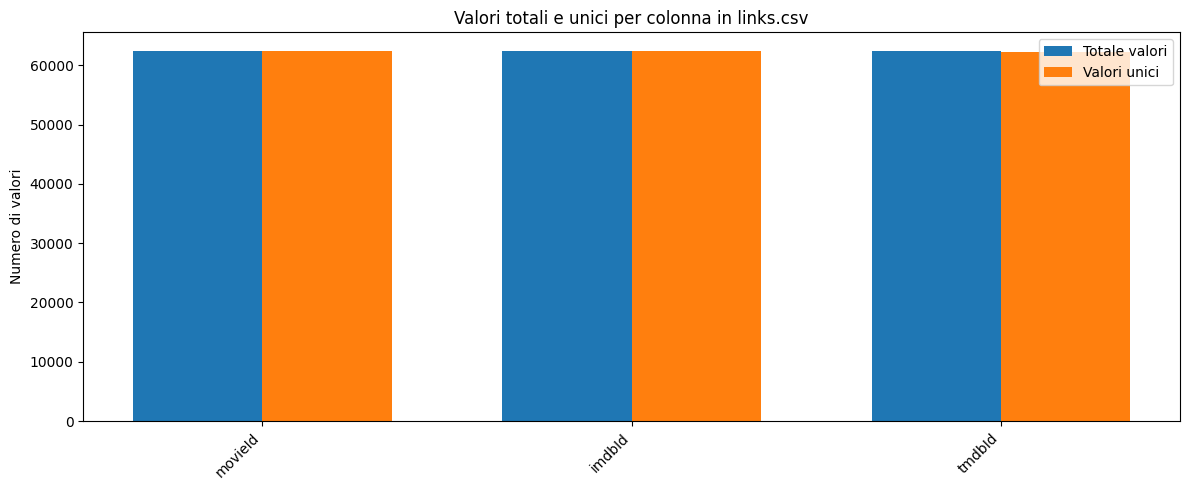


--- GENOME-SCORES.CSV ---
movieId (Numerico): min=1, max=206499, dtype=int64
tagId (Numerico): min=1, max=1128, dtype=int64
relevance (Numerico): min=0.0002499999999999, max=1.0, dtype=float64


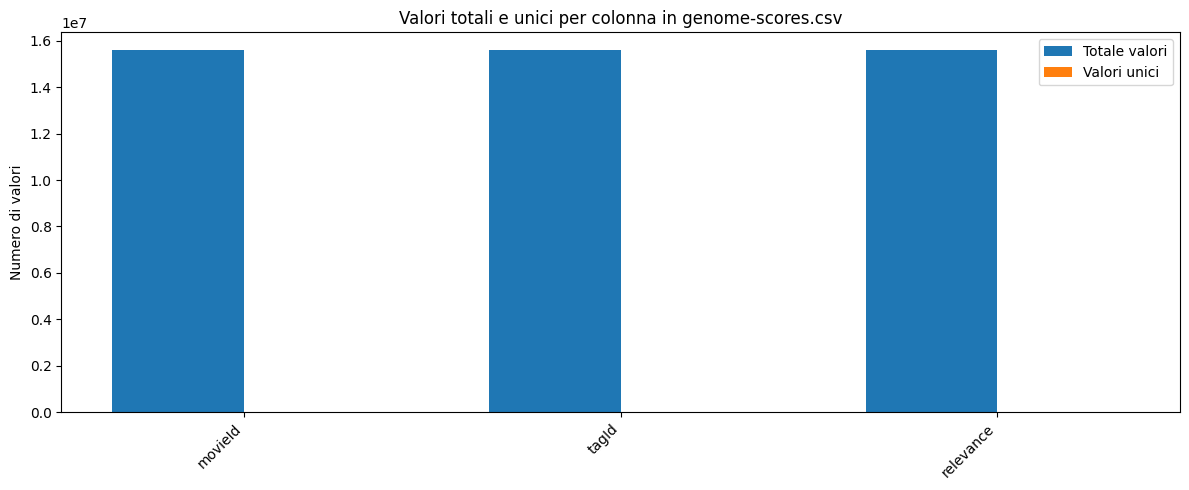


--- GENOME-TAGS.CSV ---
tagId (Numerico): min=1, max=1128, dtype=int64
tag (Categorico): 1128 valori unici, esempi=['007' '007 (series)' '18th century' '1920s' '1930s' '1950s' '1960s'
 '1970s' '1980s' '19th century']


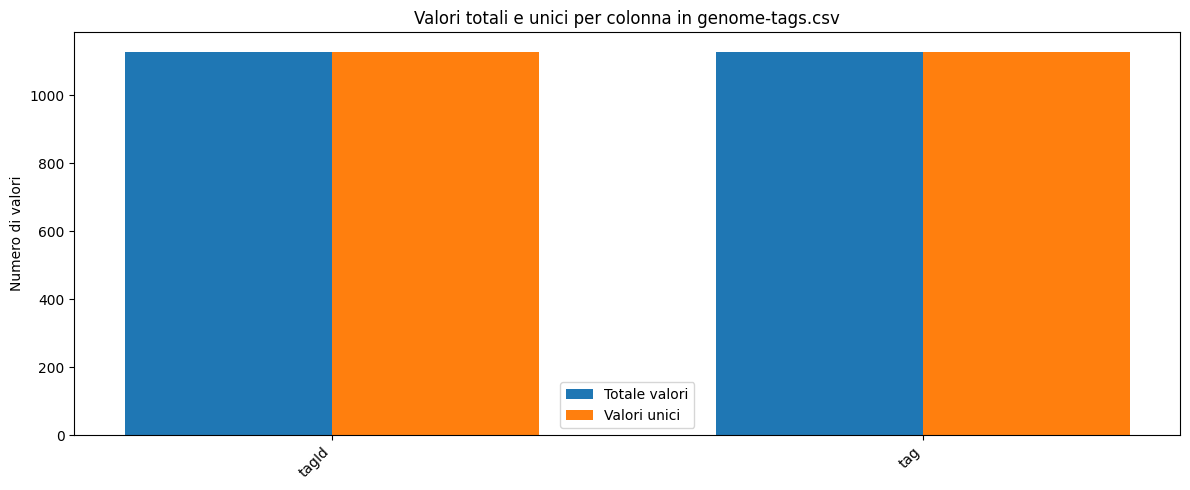

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path base del dataset
base_path = "/kaggle/input/film-dataset/ml-25m/"

# Lista dei file principali
files = {
    "movies": "movies.csv",
    "ratings": "ratings.csv",
    "tags": "tags.csv",
    "links": "links.csv",
    "genome_scores": "genome-scores.csv",
    "genome_tags": "genome-tags.csv"
}

# Funzione per analizzare il dataframe e creare grafici
def analyze_df(df, name):
    print(f"\n--- {name.upper()} ---")
    total_counts = []
    unique_counts = []
    columns = []

    for col in df.columns:
        columns.append(col)
        total = df[col].shape[0]
        unique = df[col].nunique()
        total_counts.append(total)
        unique_counts.append(unique)

        if pd.api.types.is_numeric_dtype(df[col]):
            print(f"{col} (Numerico): min={df[col].min()}, max={df[col].max()}, dtype={df[col].dtype}")
        else:
            n_unique = len(df[col].unique())
            print(f"{col} (Categorico): {n_unique} valori unici, esempi={df[col].unique()[:10]}")

    # Creazione grafico con barre più strette
    x = np.arange(len(columns))
    width = 0.35  # larghezza barre ridotta

    plt.figure(figsize=(12,5))
    plt.bar(x - width/2, total_counts, width=width, label='Totale valori')
    plt.bar(x + width/2, unique_counts, width=width, label='Valori unici')
    plt.xticks(x, columns, rotation=45, ha='right')
    plt.ylabel('Numero di valori')
    plt.title(f'Valori totali e unici per colonna in {name}')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Caricamento e analisi dei file
for key, filename in files.items():
    try:
        df = pd.read_csv(base_path + filename)
        analyze_df(df, filename)
    except FileNotFoundError:
        print(f"File {filename} non trovato.")


# SELEZIONE CAMPIONE

Caricamento dei file originali del dataset MovieLens e creazione di un campione ridotto dei dati.
Vengono selezionati i film più popolari e un gruppo casuale di utenti, filtrando di conseguenza tutti i dataset.
Il risultato è un sottoinsieme coerente e più leggero, pronto per la fase di pulizia.

In [2]:
# Caricamento dei file del dataset MovieLens
movies_raw = pd.read_csv(base_path + "movies.csv")
ratings_raw = pd.read_csv(base_path + "ratings.csv")
tags_raw = pd.read_csv(base_path + "tags.csv")
genome_scores_raw = pd.read_csv(base_path + "genome-scores.csv")
genome_tags_raw = pd.read_csv(base_path + "genome-tags.csv")

# Selezione dei 3000 film con più valutazioni
top_movies = ratings_raw['movieId'].value_counts().head(3000).index

# Selezione casuale di 5000 utenti
sample_users = ratings_raw['userId'].drop_duplicates().sample(5000, random_state=42)

# Filtraggio dei dati in base ai film e agli utenti scelti
ratings_sample = ratings_raw[
    ratings_raw['movieId'].isin(top_movies) &
    ratings_raw['userId'].isin(sample_users)
].copy()

tags_sample = tags_raw[
    tags_raw['movieId'].isin(top_movies) &
    tags_raw['userId'].isin(sample_users)
].copy()

movies_sample = movies_raw[movies_raw['movieId'].isin(top_movies)].copy()

genome_scores_sample = genome_scores_raw[
    genome_scores_raw['movieId'].isin(top_movies)
].copy()

genome_tags_sample = genome_tags_raw.copy()  # resta uguale

# Creazione dei DataFrame finali per i prossimi passaggi
movies = movies_sample.reset_index(drop=True)
ratings = ratings_sample.reset_index(drop=True)
tags = tags_sample.reset_index(drop=True)
genome_scores = genome_scores_sample.reset_index(drop=True)
genome_tags = genome_tags_sample.reset_index(drop=True)

# Visualizzazione delle dimensioni dei nuovi dataset
print("\n--- DIMENSIONI DOPO CAMPIONAMENTO ---")
print(f"Movies: {movies.shape}")
print(f"Ratings: {ratings.shape}")
print(f"Tags: {tags.shape}")
print(f"Genome Scores: {genome_scores.shape}")
print(f"Genome Tags: {genome_tags.shape}")



--- DIMENSIONI DOPO CAMPIONAMENTO ---
Movies: (3000, 3)
Ratings: (664054, 4)
Tags: (18787, 4)
Genome Scores: (3384000, 3)
Genome Tags: (1128, 2)


# PULIZIA DATI

Rimozione dei valori mancanti e duplicati, formattazione di titoli e generi dei film, uniformazione dei tag e mantenimento dei dati coerenti tra film, utenti e tag.
Visualizzazione delle dimensioni aggiornate e anteprima dei dataset puliti.

In [5]:
def compare_shape(name, shape_before, shape_after):
    print(f"{name}: {shape_before} --> {shape_after} (righe, colonne)")

# Pulizia del dataset movies
shape_before = movies.shape
movies = movies.dropna(subset=['title', 'genres'])
movies['title'] = movies['title'].str.strip()
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)').astype('Int64')
movies['title'] = movies['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True).str.strip()
movies['genres'] = movies['genres'].apply(lambda x: x.split('|') if x != '(no genres listed)' else [])
compare_shape("Movies", shape_before, movies.shape)
valid_movie_ids = set(movies['movieId'])

# Pulizia del dataset ratings
shape_before = ratings.shape
ratings = ratings.dropna(subset=['userId', 'movieId', 'rating'])
ratings = ratings[ratings['movieId'].isin(valid_movie_ids)]
ratings = ratings.drop_duplicates(subset=['userId','movieId'])
compare_shape("Ratings", shape_before, ratings.shape)

# Pulizia del dataset tags
shape_before = tags.shape
tags = tags.dropna(subset=['userId', 'movieId', 'tag'])
tags['tag'] = tags['tag'].str.strip().str.lower()
tags = tags[tags['movieId'].isin(valid_movie_ids)]
tags = tags.drop_duplicates(subset=['userId','movieId','tag'])
compare_shape("Tags", shape_before, tags.shape)

# Pulizia dei dataset genome-scores e genome-tags
shape_before_scores = genome_scores.shape
shape_before_tags = genome_tags.shape
genome_scores = genome_scores.dropna(subset=['movieId','tagId','relevance'])
genome_tags = genome_tags.dropna(subset=['tagId','tag'])
genome_scores = genome_scores[genome_scores['movieId'].isin(valid_movie_ids)]
valid_tag_ids = set(genome_tags['tagId'])
genome_scores = genome_scores[genome_scores['tagId'].isin(valid_tag_ids)]
compare_shape("Genome Scores", shape_before_scores, genome_scores.shape)
compare_shape("Genome Tags", shape_before_tags, genome_tags.shape)

print("\nPulizia completata.\n")

# Mostra un esempio dei dataset puliti
print("--- Esempio Movies ---")
print(movies.head(), "\n")
print("--- Esempio Ratings ---")
print(ratings.head(), "\n")
print("--- Esempio Tags ---")
print(tags.head(), "\n")
print("--- Esempio Genome Scores ---")
print(genome_scores.head(), "\n")
print("--- Esempio Genome Tags ---")
print(genome_tags.head())


Movies: (3000, 3) --> (3000, 4) (righe, colonne)
Ratings: (664054, 4) --> (664054, 4) (righe, colonne)
Tags: (18787, 4) --> (18787, 4) (righe, colonne)
Genome Scores: (3384000, 3) --> (3384000, 3) (righe, colonne)
Genome Tags: (1128, 2) --> (1128, 2) (righe, colonne)

Pulizia completata.

--- Esempio Movies ---
   movieId                        title  \
0        1                    Toy Story   
1        2                      Jumanji   
2        3             Grumpier Old Men   
3        4            Waiting to Exhale   
4        5  Father of the Bride Part II   

                                              genres  year  
0  [Adventure, Animation, Children, Comedy, Fantasy]  1995  
1                     [Adventure, Children, Fantasy]  1995  
2                                  [Comedy, Romance]  1995  
3                           [Comedy, Drama, Romance]  1995  
4                                           [Comedy]  1995   

--- Esempio Ratings ---
   userId  movieId  rating   timesta

# CREAZIONE EMBEDDING

Creazione degli embedding dei film.
Rimozione dei generi in vettori multi-hot, creazione della matrice film × tag dai punteggi genome e combinazione dei due vettori in un embedding unico per ogni film.
Visualizzazione della dimensione dell’embedding e anteprima dei dati.

In [6]:
import numpy as np

# Creazione di vettori multi-hot per i generi dei film
all_genres = sorted({g for sublist in movies['genres'] for g in sublist})
genre_map = {g: i for i, g in enumerate(all_genres)}

def genres_to_vector(genres):
    vec = np.zeros(len(all_genres), dtype=int)
    for g in genres:
        if g in genre_map:
            vec[genre_map[g]] = 1
    return vec

movies['genre_vector'] = movies['genres'].apply(genres_to_vector)

# Creazione della matrice film × tag dai punteggi genome
genome_matrix = genome_scores.pivot(index='movieId', columns='tagId', values='relevance').fillna(0)

# Combinazione dei vettori dei generi e dei tag in un embedding unico
def combine_vectors(row):
    movie_id = row['movieId']
    genre_vec = row['genre_vector']
    if movie_id in genome_matrix.index:
        tag_vec = genome_matrix.loc[movie_id].values
    else:
        tag_vec = np.zeros(genome_matrix.shape[1])
    return np.concatenate([genre_vec, tag_vec])

movies['embedding'] = movies.apply(combine_vectors, axis=1)

# Verifica dimensione embedding e anteprima
print("Dimensione embedding per un film:", len(movies['embedding'].iloc[0]))
print(movies[['movieId','title','embedding']].head())


Dimensione embedding per un film: 1147
   movieId                        title  \
0        1                    Toy Story   
1        2                      Jumanji   
2        3             Grumpier Old Men   
3        4            Waiting to Exhale   
4        5  Father of the Bride Part II   

                                           embedding  
0  [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...  
1  [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...  


# PROFILAZIONE UTENTI

Creazione dei profili utenti basati sui generi dei film.
Rimozione della matrice utente × film dai rating, calcolo del profilo di ciascun utente come media ponderata dei generi dei film valutati e calcolo della similarità tra utenti usando la cosine similarity.
Visualizzazione di un esempio dei profili e della matrice di similarità.

In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Creazione della matrice utente × film con i rating
user_film_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Dizionario movieId → vettore generi
movie_genre_dict = dict(zip(movies['movieId'], movies['genre_vector']))

# Calcolo del profilo utente basato sui generi ponderati dai rating
def user_genre_profile(user_id):
    user_ratings = user_film_matrix.loc[user_id]
    profile = np.zeros(len(all_genres))
    total_weight = 0
    for movie_id, rating in user_ratings.items():
        if movie_id in movie_genre_dict and rating > 0:
            profile += rating * movie_genre_dict[movie_id]
            total_weight += rating
    if total_weight > 0:
        profile /= total_weight
    return profile

# Creazione dei profili per tutti gli utenti
user_profiles = pd.DataFrame({
    user_id: user_genre_profile(user_id) 
    for user_id in user_film_matrix.index
}).T
user_profiles.columns = all_genres

# Calcolo della similarità tra utenti usando cosine similarity
user_similarity = pd.DataFrame(
    cosine_similarity(user_profiles),
    index=user_profiles.index,
    columns=user_profiles.index
)

# Verifica: anteprima dei profili e della similarità
print("Esempio profilo utente (prime righe):")
print(user_profiles.head(), "\n")

print("Esempio similarità tra utenti (prime righe e colonne):")
print(user_similarity.iloc[:5,:5])


Esempio profilo utente (prime righe):
       Action  Adventure  Animation  Children    Comedy     Crime  \
13   0.461820   0.373767   0.116186  0.107052  0.334308  0.185239   
90   0.258065   0.298387   0.072581  0.104839  0.346774  0.120968   
143  0.341085   0.379845   0.116279  0.209302  0.372093  0.124031   
202  0.456376   0.315436   0.003356  0.020134  0.258389  0.204698   
226  0.183938   0.124352   0.025537  0.034789  0.413768  0.194671   

     Documentary     Drama   Fantasy  Film-Noir    Horror      IMAX   Musical  \
13      0.002923  0.326635  0.143953   0.008403  0.084034  0.101936  0.028133   
90      0.000000  0.500000  0.072581   0.000000  0.000000  0.000000  0.032258   
143     0.000000  0.356589  0.201550   0.000000  0.000000  0.000000  0.139535   
202     0.000000  0.419463  0.117450   0.000000  0.016779  0.020134  0.000000   
226     0.011843  0.541081  0.067358   0.002591  0.061066  0.009623  0.018875   

      Mystery   Romance    Sci-Fi  Thriller       War   West

# RACCOMANDAZIONI COLLABORATIVE BASATE SUGLI UTENTI

Predizione dei film per un utente usando Collaborative Filtering basato sugli utenti.
Calcolo dei rating stimati come media pesata dei rating dei vicini più simili.
Generazione delle raccomandazioni solo per i film non ancora valutati, ordinamento dei risultati e visualizzazione delle top-100 raccomandazioni con titolo e rating stimato.

In [11]:
import pandas as pd
import numpy as np

k = 5  # numero di vicini più simili da considerare

# Funzione per predire il rating di un film per un utente
# Calcolo della media pesata dei rating dei vicini più simili che hanno valutato il film
def predict_rating(user_id, movie_id, user_similarity, user_film_matrix, k=5):
    if movie_id not in user_film_matrix.columns:
        return 0  # film non presente nella matrice
    # Identificazione degli utenti più simili
    sim_scores = user_similarity[user_id].drop(user_id)
    top_k_users = sim_scores.nlargest(k).index
    # Recupero dei rating dei vicini per il film
    neighbor_ratings = user_film_matrix.loc[top_k_users, movie_id]
    neighbor_sims = sim_scores[top_k_users]
    # Considerazione solo dei vicini che hanno valutato il film
    mask = neighbor_ratings > 0
    if mask.sum() == 0:
        return 0  # nessun vicino ha valutato il film
    # Media pesata dei rating dei vicini
    return np.dot(neighbor_ratings[mask], neighbor_sims[mask]) / neighbor_sims[mask].sum()

# Generazione delle predizioni per un utente di esempio
# Considerazione solo dei film non ancora valutati
user_example = user_film_matrix.index[0]  # primo utente
pred_ratings = {}
for movie_id in user_film_matrix.columns:
    if user_film_matrix.loc[user_example, movie_id] == 0:  # film non ancora visto
        pred_ratings[movie_id] = predict_rating(user_example, movie_id, user_similarity, user_film_matrix, k=k)

# Ordinamento dei film predetti in ordine decrescente di rating
pred_sorted = dict(sorted(pred_ratings.items(), key=lambda x: x[1], reverse=True))

# Estrazione e visualizzazione delle top-100 raccomandazioni
top_100_movies = list(pred_sorted.keys())[:100]
print("Top-100 film raccomandati per l'utente:", user_example)
for movie_id in top_100_movies:
    title = movies.loc[movies['movieId'] == movie_id, 'title'].values[0]
    print(f"{title} (predicted rating: {pred_sorted[movie_id]:.2f})")


Top-100 film raccomandati per l'utente: 13
Grand Day Out with Wallace and Gromit, A (predicted rating: 5.00)
Gods Must Be Crazy, The (predicted rating: 5.00)
History of the World: Part I (predicted rating: 5.00)
Creature Comforts (predicted rating: 5.00)
Tucker & Dale vs Evil (predicted rating: 5.00)
The Lego Movie (predicted rating: 5.00)
Canadian Bacon (predicted rating: 5.00)
Little Women (predicted rating: 5.00)
Star Trek: Generations (predicted rating: 5.00)
In the Mouth of Madness (predicted rating: 5.00)
Star Trek: The Motion Picture (predicted rating: 5.00)
Star Trek VI: The Undiscovered Country (predicted rating: 5.00)
Star Trek III: The Search for Spock (predicted rating: 5.00)
Star Trek IV: The Voyage Home (predicted rating: 5.00)
Romy and Michele's High School Reunion (predicted rating: 5.00)
Alien: Resurrection (predicted rating: 5.00)
Sphere (predicted rating: 5.00)
Poltergeist (predicted rating: 5.00)
Dark Crystal, The (predicted rating: 5.00)
2010: The Year We Make Cont

# RACCOMANDAZIONI BASATE SUI CONTENUTI

Raccomandazioni Content-Based per un utente.
Calcolo della similarità tra film usando gli embedding (generi + tag genome) e accumulo dei punteggi dei film simili a quelli già visti dall’utente.
Esclusione dei film già valutati, ordinamento dei punteggi e visualizzazione delle top-100 raccomandazioni con titolo e score.

In [14]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Content-Based Filtering
# Calcolo della similarità tra film usando gli embedding (generi + tag genome)
film_embeddings = np.stack(movies['embedding'].values)
film_similarity = cosine_similarity(film_embeddings)

# Creazione di un DataFrame per facilitare l'accesso alla similarità
film_similarity_df = pd.DataFrame(film_similarity, index=movies['movieId'], columns=movies['movieId'])

# Funzione per raccomandare film simili a quelli già apprezzati da un utente
def recommend_content_based(user_id, top_n=30):
    # Identificazione dei film già valutati dall'utente
    seen_movies = user_film_matrix.loc[user_id]
    seen_movies = seen_movies[seen_movies > 0].index
    
    # Accumulazione dei punteggi dei film simili
    scores = np.zeros(len(movies))
    movie_id_to_index = {mid: idx for idx, mid in enumerate(movies['movieId'])}
    
    for movie_id in seen_movies:
        idx = movie_id_to_index[movie_id]
        scores += film_similarity[idx]
    
    # Esclusione dei film già visti
    for movie_id in seen_movies:
        idx = movie_id_to_index[movie_id]
        scores[idx] = -1  # non raccomandare film già visti
    
    # Ordinamento dei punteggi e selezione dei top-N
    top_indices = np.argsort(scores)[::-1][:top_n]
    top_movies = movies.iloc[top_indices][['movieId','title']]
    top_movies['score'] = scores[top_indices]
    
    return top_movies

# Generazione delle top-100 raccomandazioni Content-Based per l'utente esempio
user_example = user_film_matrix.index[0]
top_movies_cb = recommend_content_based(user_example, top_n=100)

# Visualizzazione completa delle raccomandazioni con punteggio
for idx, row in top_movies_cb.iterrows():
    print(f"{row['title']} (score: {row['score']:.4f})")


Spider-Man: Into the Spider-Verse (score: 272.5651)
Avengers: Infinity War - Part II (score: 272.4189)
Ready Player One (score: 270.6798)
A Quiet Place (score: 269.9979)
Avengers: Infinity War - Part I (score: 268.2606)
Thor: Ragnarok (score: 267.5844)
Deadpool 2 (score: 266.7626)
Mission: Impossible - Fallout (score: 266.4581)
Star Wars: The Last Jedi (score: 265.8879)
Bohemian Rhapsody (score: 265.6483)
It (score: 265.3222)
Untitled Spider-Man Reboot (score: 264.8309)
Black Panther (score: 263.5256)
Solo: A Star Wars Story (score: 262.2731)
Incredibles 2 (score: 261.1168)
Die Hard (score: 260.8461)
Blade Runner 2049 (score: 260.3406)
Coco (score: 260.0739)
Edge of Tomorrow (score: 259.2455)
Isle of Dogs (score: 258.3928)
Jumanji: Welcome to the Jungle (score: 258.2885)
Mad Max: Fury Road (score: 256.5183)
Green Book (score: 256.2616)
Kingsman: The Golden Circle (score: 255.9647)
The Martian (score: 255.6375)
Three Billboards Outside Ebbing, Missouri (score: 255.2451)
Ant-Man and the 

# RACCOMANDAZIONI IBRIDE

Raccomandazioni ibride che combinano Collaborative Filtering e Content-Based Filtering.
Calcolo separato delle predizioni CF e CB, fusione pesata secondo differenti proporzioni (70-30, 50-50, 30-70), ordinamento dei punteggi e visualizzazione delle top-100 raccomandazioni con titolo e score.

In [15]:
import pandas as pd
import numpy as np

# Funzione per ottenere predizioni Collaborative Filtering per un utente
def get_cf_predictions(user_id, top_n=100):
    pred_ratings = {}
    for movie_id in user_film_matrix.columns:
        if user_film_matrix.loc[user_id, movie_id] == 0:
            pred_ratings[movie_id] = predict_rating(user_id, movie_id, user_similarity, user_film_matrix, k=5)
    return pd.Series(pred_ratings)

# Funzione per ottenere predizioni Content-Based per un utente
def get_cb_predictions(user_id, top_n=100):
    return recommend_content_based(user_id, top_n=top_n)['score']

# Funzione per generare raccomandazioni ibride combinando CF e CB con pesi
def hybrid_recommendations(user_id, weight_cf=0.7, weight_cb=0.3, top_n=100):
    cf_pred = get_cf_predictions(user_id)
    cb_pred = get_cb_predictions(user_id)
    
    # Allineamento dei film presenti in entrambe le predizioni
    common_movies = cf_pred.index.intersection(cb_pred.index)
    cf_pred = cf_pred[common_movies]
    cb_pred = cb_pred[common_movies]
    
    # Fusione pesata delle predizioni
    hybrid_score = weight_cf * cf_pred + weight_cb * cb_pred
    top_movies = hybrid_score.sort_values(ascending=False).head(top_n)
    
    # Restituzione dei titoli e degli score
    top_movies = pd.DataFrame({
        'movieId': top_movies.index,
        'score': top_movies.values
    })
    top_movies = top_movies.merge(movies[['movieId','title']], on='movieId')
    return top_movies

# Esempio di raccomandazioni ibride per il primo utente
user_example = user_film_matrix.index[0]

# Combinazioni peso CF-CB
top_hybrid_70_30 = hybrid_recommendations(user_example, weight_cf=0.7, weight_cb=0.3, top_n=100)
top_hybrid_50_50 = hybrid_recommendations(user_example, weight_cf=0.5, weight_cb=0.5, top_n=100)
top_hybrid_30_70 = hybrid_recommendations(user_example, weight_cf=0.3, weight_cb=0.7, top_n=100)

# Visualizzazione prime 5 righe di ciascuna combinazione
print("Top 5 Hybrid 70-30:")
print(top_hybrid_70_30.head(), "\n")

print("Top 5 Hybrid 50-50:")
print(top_hybrid_50_50.head(), "\n")

print("Top 5 Hybrid 30-70:")
print(top_hybrid_30_70.head())


Top 5 Hybrid 70-30:
   movieId      score                     title
0     2997  82.844503      Being John Malkovich
1     2987  82.391961  Who Framed Roger Rabbit?
2     2991  80.999364          Live and Let Die
3     2985  80.472182                   RoboCop
4     2906  80.275322             Random Hearts 

Top 5 Hybrid 50-50:
   movieId       score                     title
0     2997  135.074160      Being John Malkovich
1     2991  134.998940          Live and Let Die
2     2987  134.819379  Who Framed Roger Rabbit?
3     2906  133.792204             Random Hearts
4     2993  133.381313               Thunderball 

Top 5 Hybrid 30-70:
   movieId       score                     title
0     2991  188.998515          Live and Let Die
1     2906  187.309086             Random Hearts
2     2997  187.303817      Being John Malkovich
3     2987  187.246798  Who Framed Roger Rabbit?
4     2993  186.733838               Thunderball


# CONFRONTO TRA GLI APPROCCI

Confronto dei top-N film raccomandati tra diversi approcci (CF, CB, ibridi).
Calcolo della frazione di film comuni tra metodi per tutti gli utenti e visualizzazione tramite heatmap.
Creazione di un diagramma di Venn per un utente di esempio, per mostrare le intersezioni tra CF, CB e ibrido 70-30.

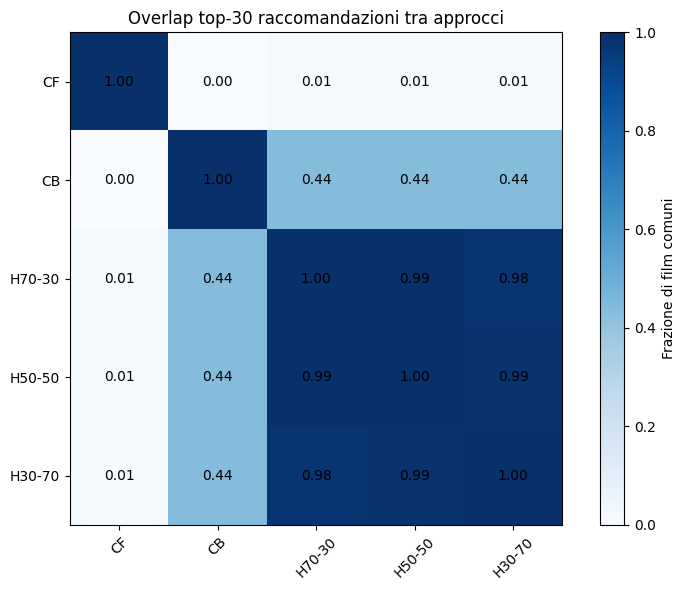

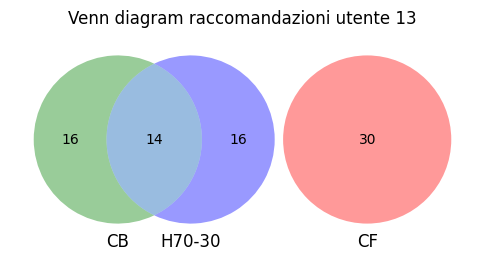

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_venn import venn3

# Confronto raccomandazioni tra diversi approcci
top_n = 30  # numero di raccomandazioni da considerare
methods = ["CF", "CB", "H70-30", "H50-50", "H30-70"]

# Selezione utenti con raccomandazioni disponibili in tutti gli approcci
users_to_plot = [u for u in user_film_matrix.index
                 if u in rec_cf_dict 
                 and u in rec_cb_dict 
                 and all(u in rec_hybrid_dict[s] for s in ["70-30","50-50","30-70"])]

# Costruzione matrice di overlap tra metodi
overlap_matrix = np.zeros((len(methods), len(methods)))

for i, m1 in enumerate(methods):
    for j, m2 in enumerate(methods):
        overlap_sum = 0
        for user_id in users_to_plot:
            # Selezione set di raccomandazioni per m1
            if m1 == "CF":
                set1 = set(rec_cf_dict[user_id][:top_n])
            elif m1 == "CB":
                set1 = set(rec_cb_dict[user_id][:top_n])
            else:  # Hybrid
                split = m1[1:]  # es. "70-30"
                set1 = set(rec_hybrid_dict[split][user_id][:top_n])
            
            # Selezione set di raccomandazioni per m2
            if m2 == "CF":
                set2 = set(rec_cf_dict[user_id][:top_n])
            elif m2 == "CB":
                set2 = set(rec_cb_dict[user_id][:top_n])
            else:
                split = m2[1:]
                set2 = set(rec_hybrid_dict[split][user_id][:top_n])
            
            # Frazione di film comuni
            overlap_sum += len(set1 & set2) / top_n
        
        # Media sull'insieme degli utenti
        overlap_matrix[i,j] = overlap_sum / len(users_to_plot)

# Heatmap overlap tra approcci
plt.figure(figsize=(8,6))
im = plt.imshow(overlap_matrix, cmap="Blues", vmin=0, vmax=1)

plt.xticks(range(len(methods)), methods, rotation=45)
plt.yticks(range(len(methods)), methods)

for i in range(len(methods)):
    for j in range(len(methods)):
        plt.text(j, i, f"{overlap_matrix[i,j]:.2f}", ha="center", va="center", color="black")

plt.title(f"Overlap top-{top_n} raccomandazioni tra approcci")
plt.colorbar(im, label="Frazione di film comuni")
plt.tight_layout()
plt.show()

# Venn diagram per un utente esempio
user_id = users_to_plot[0]
set_cf = set(rec_cf_dict[user_id][:top_n])
set_cb = set(rec_cb_dict[user_id][:top_n])
set_hybrid = set(rec_hybrid_dict["70-30"][user_id][:top_n])

plt.figure(figsize=(6,6))
venn3([set_cf, set_cb, set_hybrid], ('CF', 'CB', 'H70-30'))
plt.title(f"Venn diagram raccomandazioni utente {user_id}")
plt.show()